**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import requests
from sklearn.model_selection import train_test_split

**LOADING DATASET'S URL**

In [ ]:
confirmed_filepath = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
death_filepath = '/content/time_series_covid19_deaths_global.csv'
recovered_filepath = '/content/time_series_covid19_recovered_global.csv'

**APPLY THE LINEAR REGRESSION AND SVM MODEL ON CONFIRMED_CASES**

**LINEAR REGRESSION**

In [ ]:
confirmed_global = confirmed_filepath.iloc[:, 4:].sum(axis=0)

# Dates
dates = pd.to_datetime(confirmed_filepath.columns[4:])

# Prepare data for modeling
X = pd.to_numeric(pd.to_datetime(dates)).values.reshape(-1, 1)
y = confirmed_global.values

In [ ]:
# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

LinearRegression()

In [ ]:
# Predictions
linear_reg_output = linear_reg_model.predict(X)

In [ ]:
# Output
output_lr_df = pd.DataFrame({
    'Dates': dates,
    'Linear Regression Output': linear_reg_output
})

In [ ]:
# Filter the DataFrame for the specified date range
start_date = '2020-12-07'
end_date = '2020-12-10'
target_data = output_lr_df[(output_lr_df['Dates'] >= start_date) & (output_lr_df['Dates'] <= end_date)]

In [ ]:
# Display the filtered data
print(target_data)

         Dates  Linear Regression Output
320 2020-12-07              9.973938e+07
321 2020-12-08              1.004466e+08
322 2020-12-09              1.011539e+08
323 2020-12-10              1.018612e+08


**SVM**

In [ ]:
confirmed_global = confirmed_filepath.iloc[:, 4:].sum(axis=0)

# Dates
dates = pd.to_datetime(confirmed_filepath.columns[4:])

# Prepare data for modeling
X = pd.to_numeric(pd.to_datetime(dates)).values.reshape(-1, 1)
y = confirmed_global.values

In [ ]:
# Support Vector Machine model
svm_model = make_pipeline(StandardScaler(), SVR(kernel='linear'))
svm_model.fit(X, y)

# Predictions
svm_output = svm_model.predict(X)

In [ ]:
# Output
output_svm_df = pd.DataFrame({
    'Dates': dates,
    'Support Vector Machine Output': svm_output
})

In [ ]:
# Filter the DataFrame for the specified date range
start_date = '2020-12-07'
end_date = '2020-12-10'
target_datasvm = output_svm_df[(output_lr_df['Dates'] >= start_date) & (output_lr_df['Dates'] <= end_date)]

In [ ]:
print(target_datasvm)

         Dates  Support Vector Machine Output
320 2020-12-07                    207814696.0
321 2020-12-08                    207814699.0
322 2020-12-09                    207814702.0
323 2020-12-10                    207814705.0


**Comparison of LR and SVM for confirmed cases**

In [ ]:
#LR
start_date = '2020-12-07'
end_date = '2020-12-10'
target_data = output_lr_df[(output_lr_df['Dates'] >= start_date) & (output_lr_df['Dates'] <= end_date)]

print(target_data)

         Dates  Linear Regression Output
320 2020-12-07              9.973938e+07
321 2020-12-08              1.004466e+08
322 2020-12-09              1.011539e+08
323 2020-12-10              1.018612e+08


In [ ]:
#SVM
start_date = '2020-12-07'
end_date = '2020-12-10'
target_datasvm = output_svm_df[(output_lr_df['Dates'] >= start_date) & (output_lr_df['Dates'] <= end_date)]

print(target_datasvm)

         Dates  Support Vector Machine Output
320 2020-12-07                    207814696.0
321 2020-12-08                    207814699.0
322 2020-12-09                    207814702.0
323 2020-12-10                    207814705.0


**Total number of confirmed cases**

---



In [ ]:
total_confirmedcases = confirmed_filepath.iloc[:, 4:].sum().sum()

In [ ]:
print("Total number of confirmed cases:", total_confirmedcases)

Total number of confirmed cases: 316910296319


**APPLY HOLT'S WINTERS MODEL
Holt-Winters is a model of time series behavior. Forecasting always requires a model, and Holt-Winters is a way to model three aspects of the time series: a typical value (average), a slope (trend) over time, and a cyclical repeating pattern (seasonality).**

In [ ]:
dates = pd.to_datetime(confirmed_filepath.columns[4:])
actual_cases = confirmed_filepath.iloc[:, 4:].sum(axis=0)

In [ ]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(pd.to_numeric(dates).values.reshape(-1, 1), actual_cases)

LinearRegression()

In [ ]:
# Train Holt-Winters
holt_winters_model = ExponentialSmoothing(actual_cases, seasonal='add', trend='add', seasonal_periods=7)
holt_winters_fit = holt_winters_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
lr_predictions = lr_model.predict(pd.to_numeric(dates).values.reshape(-1, 1))

In [ ]:
holt_winters_predictions = holt_winters_fit.predict(start=0, end=len(dates) - 1)

In [ ]:
#comparison
comparison_df = pd.DataFrame({
    'Dates': dates,
    'LR': lr_predictions,
    'Holt-Winters Model Prediction': holt_winters_predictions,
    'Real data of total global confirmed cases': actual_cases.values
})

In [ ]:
start_date = '2020-12-07'
end_date = '2020-12-11'
filtered_comparison_df = comparison_df[(comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)]
print(filtered_comparison_df)

                Dates            LR  Holt-Winters Model Prediction  \
2020-12-07 2020-12-07  9.973938e+07                   6.790916e+07   
2020-12-08 2020-12-08  1.004466e+08                   6.836633e+07   
2020-12-09 2020-12-09  1.011539e+08                   6.899562e+07   
2020-12-10 2020-12-10  1.018612e+08                   6.970062e+07   
2020-12-11 2020-12-11  1.025684e+08                   7.178274e+07   

            Real data of total global confirmed cases  
2020-12-07                                   67785484  
2020-12-08                                   68416150  
2020-12-09                                   69081500  
2020-12-10                                   70576907  
2020-12-11                                   71282658  


**SVR MODEL**

In [ ]:
# # Train Support Vector Regression (SVR) model
# svr_model = SVR(kernel='linear')
# svr_model.fit(pd.to_numeric(dates).values.reshape(-1, 1), actual_cases)

# svr_predictions = svr_model.predict(pd.to_numeric(dates).values.reshape(-1, 1))
# comparison_df = pd.DataFrame({
#     'SVR': svr_predictions,
# })

# start_date = '2020-12-07'
# end_date = '2020-12-07'
# filtered_comparison_df = comparison_df[(comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)]

# print(filtered_comparison_df)

**Results of Growth of Cases Monthly.**

In [ ]:
confirmed_data = confirmed_filepath
death_data = pd.read_csv(death_filepath)
recovered_data = pd.read_csv(recovered_filepath)

In [ ]:
# Transform the data to long format
confirmed_data_long = confirmed_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
death_data_long = death_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
recovered_data_long = recovered_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')

In [ ]:
# Convert the date column to datetime format
confirmed_data_long['Date'] = pd.to_datetime(confirmed_data_long['Date'])
death_data_long['Date'] = pd.to_datetime(death_data_long['Date'])
recovered_data_long['Date'] = pd.to_datetime(recovered_data_long['Date'])

<ipython-input-30-7cf11c2f3cec>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  death_data_long['Date'] = pd.to_datetime(death_data_long['Date'])
<ipython-input-30-7cf11c2f3cec>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_data_long['Date'] = pd.to_datetime(recovered_data_long['Date'])


In [ ]:
# Aggregate data by date
confirmed_cases = confirmed_data_long.groupby('Date')['Confirmed'].sum()
death_cases = death_data_long.groupby('Date')['Deaths'].sum()
recovered_cases = recovered_data_long.groupby('Date')['Recovered'].sum()

In [ ]:
# Filter the data based on the start and end dates
start_date = '01/02/2020'
end_date = '30/11/2020'
confirmed_cases = confirmed_cases.loc[start_date:end_date]
death_cases = death_cases.loc[start_date:end_date]
recovered_cases = recovered_cases.loc[start_date:end_date]

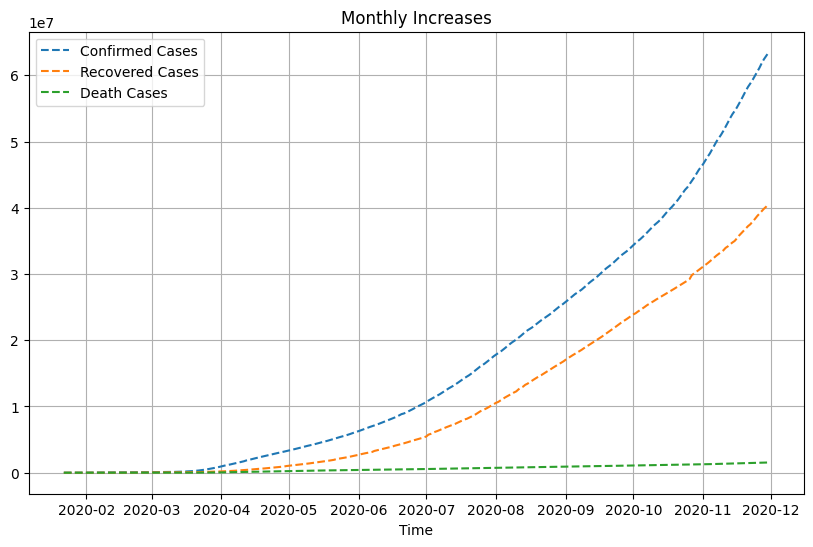

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(confirmed_cases.index, confirmed_cases.values, label='Confirmed Cases', linestyle='--')
plt.plot(recovered_cases.index, recovered_cases.values, label='Recovered Cases', linestyle='--')
plt.plot(death_cases.index, death_cases.values, label='Death Cases', linestyle='--')
plt.xlabel('Time')
plt.title('Monthly Increases')
plt.legend()
plt.grid(True)
plt.show()